#### **Business task:**
- Bellabeat is a wellness company founded by Urška Sršen and Sandro Mur (stakeholder) in 2014.
- key stakeholders: Urska (co-founder + Chief Creative Officer) + Sando (Co-Founder & Mathematician ) + Bellabeat marketing analytics team.
- Usrka has asked us to do the following:
    * Analyze non-Bellabeat smart device data to gain insight into how consumers are using their smart devices.
    * Apply these insights to one of  Bellabeat’s products, to help guide the Bellabeat marketing strategy (stakeholder) to reveal more opportunities for growth.
    
#### **Dataset and Tools:**
- Data is provided by https://www.kaggle.com/arashnic in multiple excel files and it’s hosted on Kaggle platform.
- Data is mostly in long format but some is wide format.
- Python and Microsoft Excel are used here as a data analysis tools

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1 Load the Data
path = "/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/"
daily = pd.read_csv(path + 'dailyActivity_merged.csv')
hourly_steps = pd.read_csv(path + 'hourlySteps_merged.csv')
sleep = pd.read_csv(path + 'sleepDay_merged.csv')
weight = pd.read_csv(path + 'weightLogInfo_merged.csv')
heart_rate = pd.read_csv(path + 'heartrate_seconds_merged.csv')

In [3]:
daily.shape

(940, 15)

In [4]:
daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
daily['Id'].nunique()

33

In [6]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
sleep['Id'].nunique()

24

We have sleeping data for only have 24 consumer

In [8]:
heart_rate.shape

(2483658, 3)

In [9]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [10]:
heart_rate['Id'].nunique()

14

In [11]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [12]:
weight['Id'].nunique()

8

heart_rate and weight data is too small to analyse and provide recommendation to Bellabeat as requested, so I'll look for another source of smart device data that shed more light on these two important aspects of health. but for now, I'm going to (inner join) daily_activity and sleep data.

In [13]:
#Before merging, we need to reformat and rename datetime column in sleep dataframe, change ActivityDate column from object to datetime in daily dataframe
sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [14]:
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

In [15]:
daily['ActivityDate']= pd.to_datetime(daily['ActivityDate'])

In [16]:
sleep.rename(columns={'SleepDay':'ActivityDate'}, inplace = True)

In [17]:
inner_daily_act_sleep = pd.merge(daily, sleep, on=['Id','ActivityDate'], how='inner')
inner_daily_act_sleep.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [18]:
inner_daily_act_sleep['Id'].nunique() 

24

Only 24 consumer because we inner joined dailyactivity and dailysleep data, and by so we lost data for 9 consumers..
I'm gonna check the minuteSleep_merged file, maybe we'll get data for all the 33 consumers. Otherwise, I'll soon be looking for additional sources of smart health devices, because not only sleeping data is not enough, heart rate and weight data are also too small to get useful insights from.

In [19]:
minuteSleep = pd.read_csv(path + 'minuteSleep_merged.csv')
minuteSleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [20]:
minuteSleep['Id'].nunique()

24

Same thing! 24 unique consumer.

Before start looking for other data sources, I'm gonna analyse the data I have since it's recommended by our main stakeholder. 

### Analyze FitBit Consumers Data

In [21]:
FitBit = inner_daily_act_sleep
FitBit.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [22]:
FitBit.shape

(413, 18)

In [23]:
#Drop unnecessary and duplicated columns
FitBit.drop(['LoggedActivitiesDistance','SedentaryActiveDistance', 'TrackerDistance'], axis=1, inplace= True)

#Rename Id column to user 
FitBit.rename(columns = {'Id':'User'}, inplace = True)

In [24]:
FitBit.head()

,User,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712


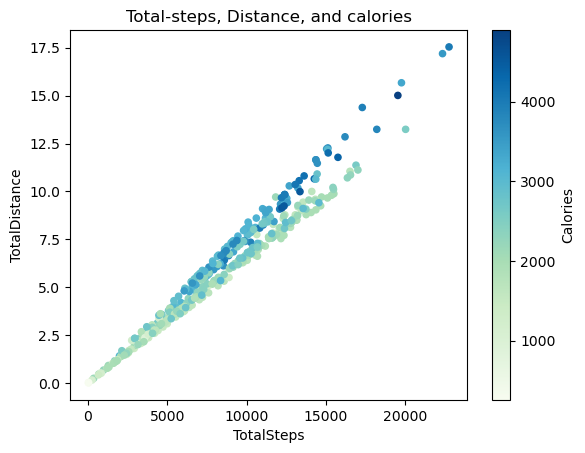

In [25]:
scatter = FitBit.plot(x = 'TotalSteps', y = 'TotalDistance', kind = 'scatter', c = 'Calories', colormap = 'GnBu', );
scatter.set_title('Total-steps, Distance, and calories');

**Obviously, the more you walk, the more calories you burn!**

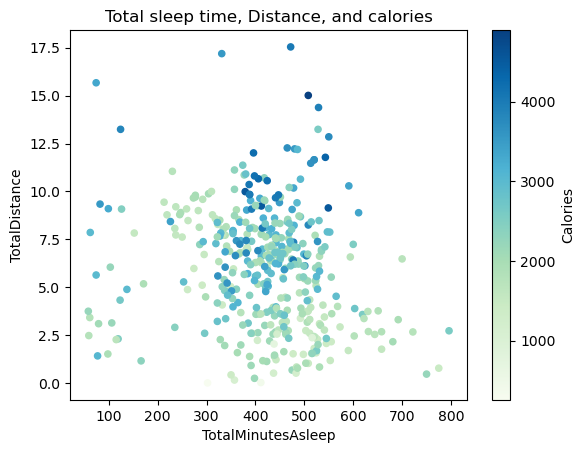

In [26]:
scatter = FitBit.plot(x = 'TotalMinutesAsleep', y = 'TotalDistance', kind = 'scatter', c = 'Calories', colormap = 'GnBu', );
scatter.set_title('Total sleep time, Distance, and calories');

**The total sleep time has no effect on burned calories amount, nor on the distance one can travel, hence it's reasonable enough to conclude that sleep has no effect on the level of consumer's activity** 

Although many studies and common sense suggest that the relation between (sleep, activity level) is positively strong, many studies found no such relation between them, and one even reported a negative impact of exercise on sleep. View this systematic review to find more about this subject: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385214/

The difference in the results of these studies was due to participants' age, health status, and the intensity of exercise intervention, and since FitBit dataset does not include these factors, it's hard to explain why exactly the analysis of sleep time, distance, and calories did no show any  relation between them.

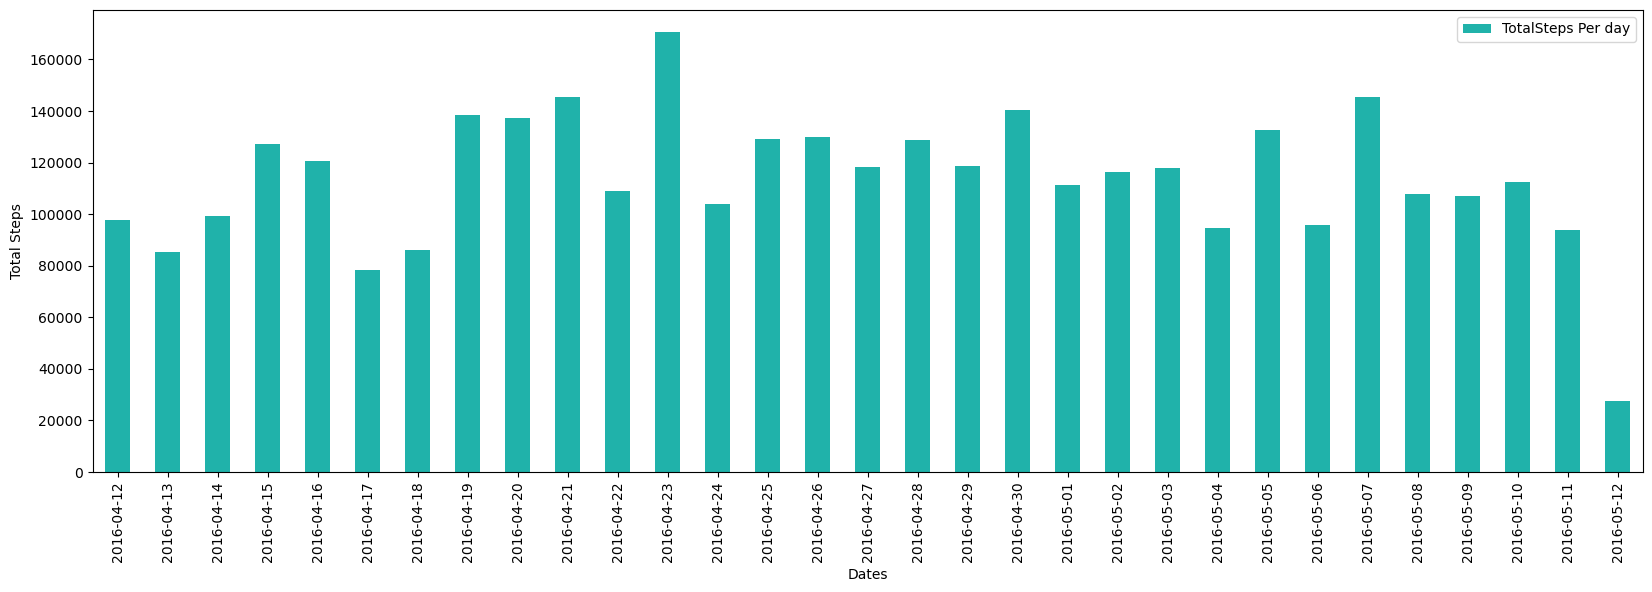

In [27]:
# Total Steps Per Day
FitBit['TotalSteps'].index = FitBit['ActivityDate']
totalStepsByDate = FitBit['TotalSteps'].groupby('ActivityDate').sum()
ax = totalStepsByDate.plot(kind="bar", x="ActivityDate",y="TotalSteps", color="lightseagreen", label="TotalSteps Per day", figsize=(20,6))
ax.set_xticklabels(totalStepsByDate.index.date)
ax.set_xlabel("Dates")
ax.set_ylabel("Total Steps")
plt.legend(loc='best')
plt.show()

**Among the top 5 active days, there are 3 Saturdays..makes sense, people have more time to exercise on weekends.**

The app can help the consumer planning the weekend ahead by suggesting one\all of the following:
- a special diet for the weekend, taking into consideration the patient's state of health, gender, and age if possible.
- a running route for each consumer based on his\her location and consumer's choice of the distance he's intending to travel.
- different routes to the consumer to add a bit of variety to the experince, hence allowing the consumer a chance to explore and to have fun while exercising.
- turn-by-turn navigation for consumers.

**Note: The app should grant the consumer the possibility of selecting other day to make plans for the walking trips other than weekends or days the consumer is usually active in.**

Let's dig deeper into steps data and try to extract patterns for consumer activity if any.

In [28]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [29]:
hourly_steps.shape

(22099, 3)

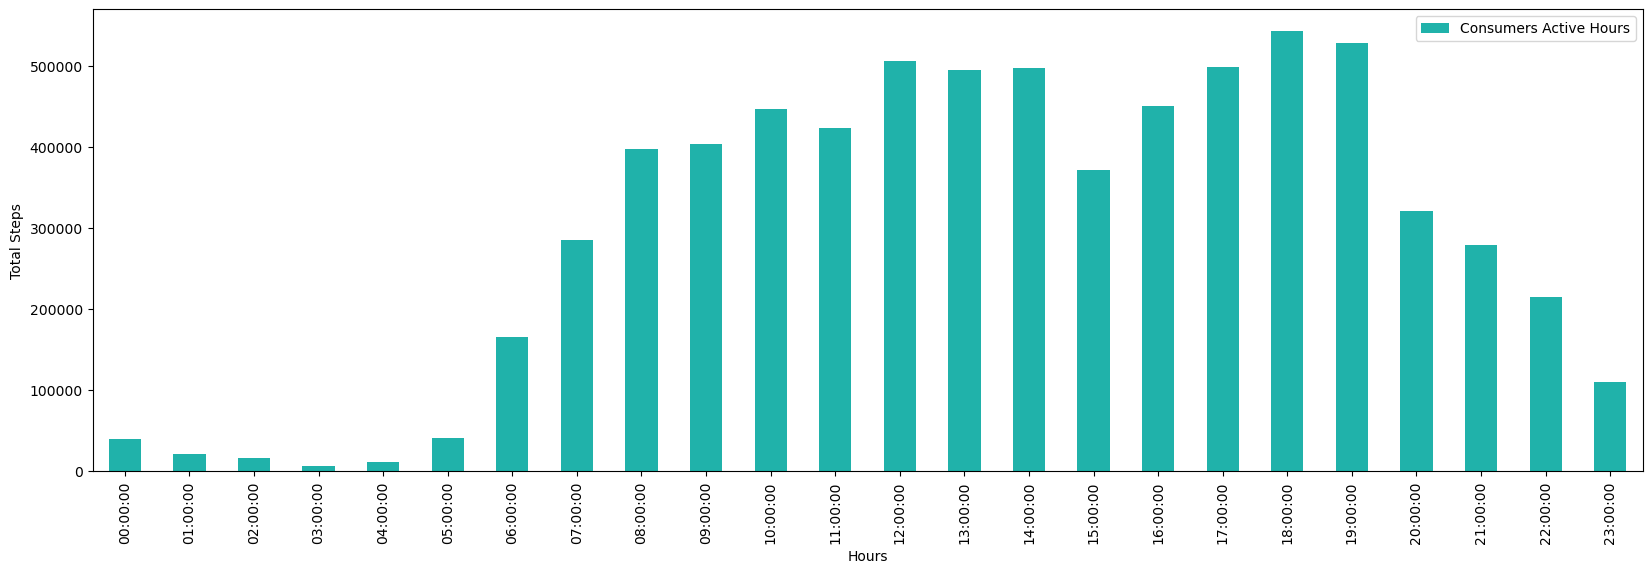

In [30]:
#group by hour and see what active hours are per consumer:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
ActiveHours = hourly_steps.groupby(hourly_steps['ActivityHour'].dt.time)['StepTotal'].sum()

ax = ActiveHours.plot(kind="bar", x="ActivityHour",y="StepTotal", color="lightseagreen", label="Consumers Active Hours", figsize=(20,6))
ax.set_xlabel("Hours")
ax.set_ylabel("Total Steps")
plt.legend(loc='best')
plt.show()

**Top 5 active Hours: 18, 19, 12, 14 and 13 respectively.**

**It will be a good time for the app to send whatever notifications or promotion for the consumers.**

In [31]:
FitBit.columns

Index(['User', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [32]:
# Group Consumers by Activity Intensity (in distance)
ActivityLevel = FitBit[['User','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance']]
ActivityLevel.head()

,User,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
0,1503960366,1.88,0.55,6.06
1,1503960366,1.57,0.69,4.71
2,1503960366,2.14,1.26,2.83
3,1503960366,2.71,0.41,5.04
4,1503960366,3.19,0.78,2.51


In [33]:
UserGroupsByActivity = ActivityLevel.groupby('User').sum()
UserGroupsByActivity.head()

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
User,,,
1503960366,69.30,21.18,108.650001
1644430081,0.70,3.45,19.000000
1844505072,0.00,0.26,6.640000
1927972279,0.00,0.00,5.160000
2026352035,0.19,0.35,97.060000


**It looks like most consumers prefer light level of activity. but let's make sure..

In [34]:
print(UserGroupsByActivity.sum())

VeryActiveDistance           598.999999
ModeratelyActiveDistance     309.849999
LightActiveDistance         1572.340001
dtype: float64


**Light level of activity is the winner..But what is the percentage of users in each activity group?**

Very-intense activity  % =  8.333333333333332
Moderate-intense activity  % =  0.0
Light-intense activity  % =  91.66666666666666


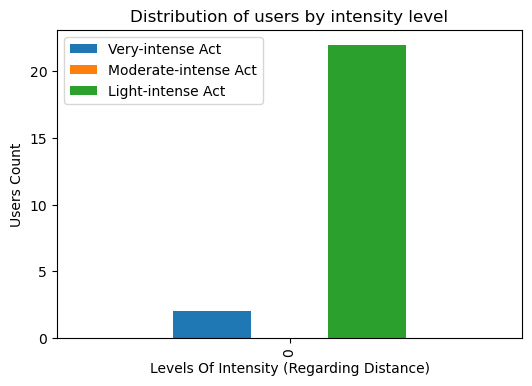

In [35]:
df = UserGroupsByActivity
rows = df.shape[0]
sumOfVeryActiveDistance = 0
sumOfModeratelyActiveDistance = 0
sumOfLightActiveDistance = 0

for index, value in df.iterrows():    
    maxi = max(list(value)) 
    unique_index = pd.Index(list(value))
    loc = unique_index.get_loc(maxi)
    if (loc == 0): sumOfVeryActiveDistance +=1
    if (loc == 1): sumOfModeratelyActiveDistance +=1
    if (loc == 2): sumOfLightActiveDistance +=1
    # print (list(value))
    # print('max_val= ' , maxi , ' ==>  max_index = ' , loc )   
    # print()   
 
print('Very-intense activity  % = ' , sumOfVeryActiveDistance / rows * 100)
print('Moderate-intense activity  % = ' , sumOfModeratelyActiveDistance / rows * 100)
print('Light-intense activity  % = ' , sumOfLightActiveDistance / rows * 100)
mylist = [sumOfVeryActiveDistance, sumOfModeratelyActiveDistance, sumOfLightActiveDistance]
UserPercdf = pd.DataFrame([mylist], columns = ['Very-intense Act','Moderate-intense Act','Light-intense Act'])
ax = UserPercdf.plot(kind="bar",  title="Distribution of users by intensity level", figsize=(6,4))
ax.set_xlabel("Levels Of Intensity (Regarding Distance)")
ax.set_ylabel("Users Count")
plt.legend(loc='best')
plt.show()

**Majority of consumers tend to do light-intense activity.**

That's all I can think for the little data I have for FitBit. 

### Summary of Analysis and Findings of FitBit dataset
- **Heart_rate and weight data is too small to analyse** and provide recommendation to Bellabeat as requested.
- The dataset I worked with had **Only 24 consumer** because I inner joined daily_activity and daily_sleep data, and by so I lost data for 9 consumers.
- I checked the minuteSleep_merged file in a try to see if I can get more observations than just 24 consumer, but I got the same result, only 24 unique consumer.
- I knew that I would have to look for additional data sources, but I decided to **start first with the Fitbit dataset since it's recommended by Urska; main stakeholder**. 

#### **Findings:**
* The **more** you **walk**, the **more calories** you **burn**!
* The total sleep time has no effect on burned calories amount, nor on the distance one can travel, hence it's reasonable enough to conclude that **sleep has no effect on the level of consumer's activity**. Although many studies and common sense suggest that the relation between (sleep, activity level) is positively strong, many studies found no such relation between them, and one even reported a negative impact of exercise on sleep. View this systematic review to find more about this subject: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385214/
* Among the **top 5 active days, there are 3 Saturdays**. Makes sense, people have more time to exercise on **weekends**.
* The **top 5 hours are all after 12 pm: 18, 19, 12, 14 and 13** respectively.
* most consumers prefer light level of activity:
    - Very-intense activity  % =  8.33
    - Moderate-intense activity  % =  0.0
    - Light-intense activity  % =  91.66

#### **Recommendations:**
- Active days and hours represent a good chance for the app to send notifications and promotion for the consumers.
- The app can help the consumer planning the weekend ahead by suggesting one\all of the following:
    * a special diet for the weekend, taking into consideration the patient's state of health, gender, and age if possible.
    * a running route for each consumer based on his\her location and consumer's choice of the distance he's intending to travel.
    * different routes to the consumer to add a bit of variety to the experince, hence allowing the consumer a chance to explore and to have fun while exercising.
    * turn-by-turn navigation for consumers.
- The app should grant the consumer the possibility of selecting other day to make plans for the walking trips other than weekends or days the consumer is usually active in.
- Since majority of consumers tend to do light-intense activity, the app can suggest the following:
    * gentle exercises to do during the day.
    * mediation techniques.
    * relaxing music tracks that goes along with the rhythm of the consumers' movement
- Unfortunately, I was not able to find a ROCCC data (Quick reminder: ROCCC stands for Reliable, Original, Comprehensive, Current, and Cited), so my advice for BellaBeat is to try to collect data from their own consumers either through Bellbeat smart devices or via surveys and to try to make the data that they collect more detailed regarding consumers information such as age, gender, health issues and other.